In [26]:
import pandas as pd 
df = pd.read_csv('/Users/Jack/Documents/ML/Projects/Approach_any_ML-/input/winequality-red.csv', sep=';') 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}
df.loc[:, "quality"] = df['quality'].map(quality_mapping)

In [28]:
# shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 for train and bottom 599 for test
df_train = df.head(1000)
df_test = df.tail(599)

In [20]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

cols = list(df.columns)
cols.remove('quality')
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [29]:
train_pred = clf.predict(df_train[cols])
test_pred = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(df_train.quality, train_pred)
test_accuracy = metrics.accuracy_score(df_test.quality, test_pred)

print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)


Train accuracy:  0.845
Test accuracy:  0.8213689482470785


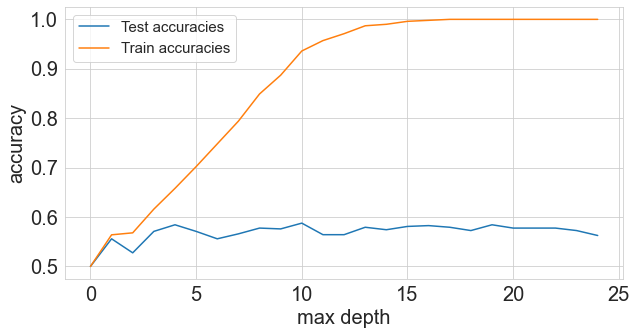

In [23]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline 

train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[cols], df_train.quality)
    train_pred = clf.predict(df_train[cols])
    test_pred = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(df_train.quality, train_pred)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_pred)  
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(test_accuracies, label='Test accuracies')
plt.plot(train_accuracies, label='Train accuracies')
plt.legend(loc='upper left', prop ={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel("max depth", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()



Text(0, 0.5, 'count')

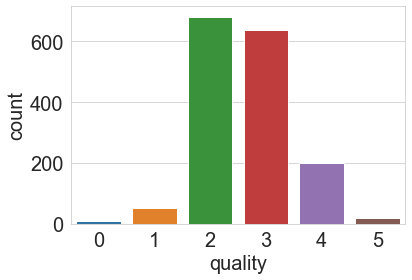

In [31]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)